# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint
import country_converter as coco
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# print(weather_api_key)
# type(weather_api_key) # str

## Generate Cities List

In [3]:
# COMMENT OUT LINES ASSOCIATED WITH CREATING A RANDOM CITY LIST SO THE CURRENT CITY LIST STAYS LOCKED.
# List for holding lat_lngs and cities
#lat_lngs = []
#cities = []

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
#lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
#for lat_lng in lat_lngs:
#    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
#    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [4]:
print(cities)

['rikitea', 'meulaboh', 'hilo', 'lasa', 'souillac', 'necochea', 'mar del plata', 'vaini', 'hermanus', 'lavrentiya', 'taoudenni', 'sinnamary', 'nanortalik', 'ushuaia', 'pierre', 'faanui', 'sentyabrskiy', 'tabuk', 'punta arenas', 'port lincoln', 'jiddah', 'buala', 'sturgis', 'eyl', 'willowmore', 'hobart', 'hithadhoo', 'praia', 'saint-philippe', 'tuktoyaktuk', 'marcona', 'bluff', 'bandarbeyla', 'novyy urengoy', 'bonham', 'sitka', 'deputatskiy', 'kapaa', 'hegra', 'chuy', 'geraldton', 'kaitangata', 'rio grande', 'aklavik', 'beloha', 'tuatapere', 'puerto ayora', 'rungata', 'grand river south east', 'ugoofaaru', 'shu', 'kysyl-syr', 'poum', 'cape town', 'mnogovershinnyy', 'vostok', 'kampot', 'nikolskoye', 'mergui', 'neiafu', 'new norfolk', 'avarua', 'flinders', 'longlac', 'atuona', 'kuche', 'taiobeiras', 'illoqqortoormiut', 'honiara', 'mumford', 'sulangan', 'pijijiapan', 'saint-joseph', 'samana', 'jamestown', 'yellowknife', 'mataura', 'busselton', 'khatanga', 'erzin', 'saskylakh', 'kodiak', 'a

In [5]:
# create DataFrame from zip of random lists of Latitude and Longitude
# http://www.pythonpandas.com/create-pandas-dataframe-from-lists-using-zip/
list_of_lat_lng_tuples = list(zip(lats, lngs))
lat_lng_df = pd.DataFrame(list_of_lat_lng_tuples, columns = ["Latitude", "Longitude"])
# lat_lng_df.head()
# len(lat_lng_df)# 1500

In [504]:
cities_list = {"city": cities}
# cities_list
cities_df = pd.DataFrame(cities_list)
cities_df.head(25)
cities_df.to_csv("output_data/cities_list.csv")

In [38]:
cities2 = pd.Series(cities)
cities2.head(10)

0          rikitea
1         meulaboh
2             hilo
3             lasa
4         souillac
5         necochea
6    mar del plata
7            vaini
8         hermanus
9       lavrentiya
dtype: object

In [8]:
units = "imperial"

url_test = "http://api.openweathermap.org/data/2.5/weather?"
city_test = "tuktoyaktuk"
# query_url_test = url_test + "&appid=" + "xxxxxxx" + "&units=" + units + "&q=" + city_test
query_url_test = url_test + "&appid=" + weather_api_key + "&units=" + units + "&q=" + city_test

In [9]:
response_test = requests.get(query_url_test).json()
response_test

{'coord': {'lon': -133.0374, 'lat': 69.4541},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 44.6,
  'feels_like': 40.17,
  'temp_min': 44.6,
  'temp_max': 44.6,
  'pressure': 1013,
  'humidity': 93},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 30},
 'clouds': {'all': 100},
 'dt': 1660949910,
 'sys': {'type': 1,
  'id': 942,
  'country': 'CA',
  'sunrise': 1660911365,
  'sunset': 1660973743},
 'timezone': -21600,
 'id': 6170031,
 'name': 'Tuktoyaktuk',
 'cod': 200}

In [10]:
# type(response_test)  # dict

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="  # with units
# url1 = "https://api.openweathermap.org/data/2.5/weather?"



In [12]:

weather_check = [requests.get(query_url + str(cities[city])).json() for city in range(len(cities))]


In [13]:
# print(cities_df)

In [14]:
try:
    pprint(f"First response is {weather_check[0]}.")
    pprint(f"The last response is {weather_check[-1]}.")
except:
    print("City not in OpenWeatherMap.")
    pass

("First response is {'coord': {'lon': -134.9692, 'lat': -23.1203}, 'weather': "
 "[{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': "
 "'04d'}], 'base': 'stations', 'main': {'temp': 72.3, 'feels_like': 72.66, "
 "'temp_min': 72.3, 'temp_max': 72.3, 'pressure': 1017, 'humidity': 73, "
 "'sea_level': 1017, 'grnd_level': 1015}, 'visibility': 10000, 'wind': "
 "{'speed': 3.74, 'deg': 300, 'gust': 4.34}, 'clouds': {'all': 55}, 'dt': "
 "1660949879, 'sys': {'country': 'PF', 'sunrise': 1660922516, 'sunset': "
 "1660963519}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': "
 '200}.')
("The last response is {'coord': {'lon': 49.8728, 'lat': 11.472}, 'weather': "
 "[{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], "
 "'base': 'stations', 'main': {'temp': 88.81, 'feels_like': 92.43, 'temp_min': "
 "88.81, 'temp_max': 88.81, 'pressure': 1005, 'humidity': 50, 'sea_level': "
 "1005, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed':

In [54]:
# set up lists to hold reponse info
lat = []
long = []
temp = []
humid = []
clouds = []
winds = []
city1 = []
city2 = []
max_temp = []
country = []
datetime = []
print_request = []
print_response = []
print_dne = []

In [16]:
#weather = [requests.get(query_url + str(cities[city]))
# .json() if weather_check.json()['coord']['cod'] == 200
#weather_json = weather.json()

In [17]:
print(len(weather_check))

616


In [44]:
cities3 = []

In [45]:

cities3 = ['mys shmidta', 'faya', 'auchi', 'airai', 'ostrovnoy', 'nalut', 'sitio novo do tocantins', 'daru', 'gejiu', 'mrirt']
cities3

['mys shmidta',
 'faya',
 'auchi',
 'airai',
 'ostrovnoy',
 'nalut',
 'sitio novo do tocantins',
 'daru',
 'gejiu',
 'mrirt']

In [47]:
for city in range(len(cities3)):
    try:
        weather3 = requests.get(query_url + str(cities3[city])).json()
        lat.append(weather3['coord']['lat'])
        long.append(weather3['coord']['lon'])
        temp.append(weather3['main']['feels_like'])
        max_temp.append(weather3['main']['temp_max'])
        humid.append(weather3['main']['humidity'])
        clouds.append(weather3['clouds']['all'])
        winds.append(weather3['wind']['speed'])
        city1.append(weather3['name'])
        country.append(weather3['sys']['country'])
        datetime.append(weather3['dt'])
        print(f"Request {city} sent for {cities3[city]}.")
        print_request.append(f"Request {city} sent for {cities3[city]}.")
        print(f"Response code {weather3['cod']} received for {cities3[city]}.")
        print_response.append(f"Response code {weather3['cod']} received for {cities3[city]}.")
    except:
        print(f"{cities3[city]} does not exist in OpenWeatherMap.")
        city2.append(cities3[city])
        print_dne.append(f"{cities3[city]} does not exist in OpenWeatherMap.")
        pass

mys shmidta does not exist in OpenWeatherMap.
Request 1 sent for faya.
Response code 200 received for faya.
Request 2 sent for auchi.
Response code 200 received for auchi.
Request 3 sent for airai.
Response code 200 received for airai.
Request 4 sent for ostrovnoy.
Response code 200 received for ostrovnoy.
Request 5 sent for nalut.
Response code 200 received for nalut.
Request 6 sent for sitio novo do tocantins.
Response code 200 received for sitio novo do tocantins.
Request 7 sent for daru.
Response code 200 received for daru.
Request 8 sent for gejiu.
Response code 200 received for gejiu.
mrirt does not exist in OpenWeatherMap.


In [50]:
print_dne

['mys shmidta does not exist in OpenWeatherMap.',
 'mrirt does not exist in OpenWeatherMap.']

In [51]:
country

['SA', 'NG', 'TL', 'RU', 'LY', 'BR', 'PG', 'CN']

In [52]:
datetime

[1660957241,
 1660957242,
 1660957242,
 1660957243,
 1660957243,
 1660957244,
 1660957245,
 1660957245]

In [53]:
temp

[66.47, 71.37, 65.57, 62.42, 85.06, 78.94, 79.41, 63.99]

In [55]:
city2

[]

In [56]:
for city in range(len(cities)):
    try:
        weather2 = requests.get(query_url + str(cities[city])).json()
        lat.append(weather2['coord']['lat'])
        long.append(weather2['coord']['lon'])
        temp.append(weather2['main']['feels_like'])
        max_temp.append(weather2['main']['temp_max'])
        humid.append(weather2['main']['humidity'])
        clouds.append(weather2['clouds']['all'])
        winds.append(weather2['wind']['speed'])
        city1.append(weather2['name'])
        country.append(weather2['sys']['country'])
        datetime.append(weather2['dt'])
        print(f"Request {city} sent for {cities[city]}.")
        print_request.append(f"Request {city} sent for {cities[city]}.")
        print(f"Response code {weather2['cod']} received for {cities[city]}.")
        print_response.append(f"Response code {weather2['cod']} received for {cities[city]}.")
    except:
        print(f"{cities[city]} does not exist in OpenWeatherMap.")
        city2.append(cities[city])
        print_dne.append(f"{cities[city]} does not exist in OpenWeatherMap.")
        pass

    

Request 0 sent for rikitea.
Response code 200 received for rikitea.
Request 1 sent for meulaboh.
Response code 200 received for meulaboh.
Request 2 sent for hilo.
Response code 200 received for hilo.
Request 3 sent for lasa.
Response code 200 received for lasa.
Request 4 sent for souillac.
Response code 200 received for souillac.
Request 5 sent for necochea.
Response code 200 received for necochea.
Request 6 sent for mar del plata.
Response code 200 received for mar del plata.
Request 7 sent for vaini.
Response code 200 received for vaini.
Request 8 sent for hermanus.
Response code 200 received for hermanus.
Request 9 sent for lavrentiya.
Response code 200 received for lavrentiya.
Request 10 sent for taoudenni.
Response code 200 received for taoudenni.
Request 11 sent for sinnamary.
Response code 200 received for sinnamary.
Request 12 sent for nanortalik.
Response code 200 received for nanortalik.
Request 13 sent for ushuaia.
Response code 200 received for ushuaia.
Request 14 sent for 

Request 121 sent for aksarka.
Response code 200 received for aksarka.
Request 122 sent for russell.
Response code 200 received for russell.
Request 123 sent for lompoc.
Response code 200 received for lompoc.
Request 124 sent for georgetown.
Response code 200 received for georgetown.
Request 125 sent for dikson.
Response code 200 received for dikson.
Request 126 sent for cutro.
Response code 200 received for cutro.
Request 127 sent for kaeo.
Response code 200 received for kaeo.
Request 128 sent for north platte.
Response code 200 received for north platte.
Request 129 sent for leningradskiy.
Response code 200 received for leningradskiy.
Request 130 sent for west freehold.
Response code 200 received for west freehold.
Request 131 sent for nara.
Response code 200 received for nara.
Request 132 sent for rawson.
Response code 200 received for rawson.
Request 133 sent for ust-nera.
Response code 200 received for ust-nera.
Request 134 sent for cabo san lucas.
Response code 200 received for ca

Request 238 sent for koroni.
Response code 200 received for koroni.
Request 239 sent for zhanaozen.
Response code 200 received for zhanaozen.
Request 240 sent for bengkulu.
Response code 200 received for bengkulu.
Request 241 sent for vardo.
Response code 200 received for vardo.
Request 242 sent for srednekolymsk.
Response code 200 received for srednekolymsk.
Request 243 sent for vanimo.
Response code 200 received for vanimo.
Request 244 sent for inuvik.
Response code 200 received for inuvik.
Request 245 sent for pangnirtung.
Response code 200 received for pangnirtung.
Request 246 sent for balkhash.
Response code 200 received for balkhash.
Request 247 sent for hakkari.
Response code 200 received for hakkari.
Request 248 sent for young.
Response code 200 received for young.
Request 249 sent for avera.
Response code 200 received for avera.
Request 250 sent for cap malheureux.
Response code 200 received for cap malheureux.
Request 251 sent for bontang.
Response code 200 received for bonta

Request 356 sent for san policarpo.
Response code 200 received for san policarpo.
Request 357 sent for pathankot.
Response code 200 received for pathankot.
Request 358 sent for tommot.
Response code 200 received for tommot.
Request 359 sent for camacha.
Response code 200 received for camacha.
Request 360 sent for hurghada.
Response code 200 received for hurghada.
Request 361 sent for katiola.
Response code 200 received for katiola.
Request 362 sent for buchanan.
Response code 200 received for buchanan.
Request 363 sent for gornopravdinsk.
Response code 200 received for gornopravdinsk.
Request 364 sent for goderich.
Response code 200 received for goderich.
Request 365 sent for uvat.
Response code 200 received for uvat.
Request 366 sent for port keats.
Response code 200 received for port keats.
Request 367 sent for bubaque.
Response code 200 received for bubaque.
Request 368 sent for shush.
Response code 200 received for shush.
Request 369 sent for paredon.
Response code 200 received for

Request 472 sent for maneadero.
Response code 200 received for maneadero.
Request 473 sent for martapura.
Response code 200 received for martapura.
Request 474 sent for kruisfontein.
Response code 200 received for kruisfontein.
Request 475 sent for teya.
Response code 200 received for teya.
Request 476 sent for antalaha.
Response code 200 received for antalaha.
Request 477 sent for muleba.
Response code 200 received for muleba.
Request 478 sent for nouadhibou.
Response code 200 received for nouadhibou.
Request 479 sent for sorland.
Response code 200 received for sorland.
Request 480 sent for port moresby.
Response code 200 received for port moresby.
Request 481 sent for tateyama.
Response code 200 received for tateyama.
Request 482 sent for prudnik.
Response code 200 received for prudnik.
Request 483 sent for vila velha.
Response code 200 received for vila velha.
Request 484 sent for salalah.
Response code 200 received for salalah.
Request 485 sent for saint-francois.
Response code 200

Request 587 sent for ponta delgada.
Response code 200 received for ponta delgada.
Request 588 sent for broome.
Response code 200 received for broome.
Request 589 sent for lichinga.
Response code 200 received for lichinga.
Request 590 sent for bereda.
Response code 200 received for bereda.
Request 591 sent for saint-leu.
Response code 200 received for saint-leu.
Request 592 sent for ferme-neuve.
Response code 200 received for ferme-neuve.
Request 593 sent for tezu.
Response code 200 received for tezu.
Request 594 sent for pec.
Response code 200 received for pec.
Request 595 sent for belaya gora.
Response code 200 received for belaya gora.
Request 596 sent for hwange.
Response code 200 received for hwange.
Request 597 sent for sao joao da barra.
Response code 200 received for sao joao da barra.
Request 598 sent for odesskoye.
Response code 200 received for odesskoye.
berikulskiy does not exist in OpenWeatherMap.
Request 600 sent for hokitika.
Response code 200 received for hokitika.
Requ

In [83]:
#city2
datetime2 = datetime.tz_convert("US/Pacific")

AttributeError: 'list' object has no attribute 'tz_convert'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
city_weather_dict ={"city": city1, "latitude": lat, "longitude": long, "Max Temp": max_temp,
                   "humidity": humid, "Feels Like": temp, "cloudiness": clouds, "wind speed": winds,
                   "country": country, "datetime": datetime}

In [61]:
city_weather = pd.DataFrame(city_weather_dict)
city_weather.head()

,city,latitude,longitude,Max Temp,humidity,Feels Like,cloudiness,wind speed,country,datetime
0,Rikitea,-23.1203,-134.9692,72.84,73,73.26,9,6.44,PF,1660957528
1,Meulaboh,4.1363,96.1285,77.40,89,79.02,69,4.41,ID,1660957529
2,Hilo,19.7297,-155.0900,89.28,83,78.21,100,6.91,US,1660957524
3,Laas,46.6166,10.7002,59.36,95,59.47,100,6.31,IT,1660957529
4,Souillac,-20.5167,57.5167,70.30,74,70.52,42,14.79,MU,1660957306


In [93]:
# unix, UTC timestamp conversion from:
# https://www.codegrepper.com/code-examples/python/convert+unix+timestamp+to+datetime+python+pandas
city_weather["date"] = pd.to_datetime(city_weather["datetime"], unit="s").dt.tz_localize("US/Pacific")

#city_weather["date"].dt.tz_localize("US/Pacific")
#city_weather["date"].dt.tz_convert("US/Pacific")
city_weather.head()

,city,latitude,longitude,Max Temp,humidity,Feels Like,cloudiness,wind speed,country,datetime,date
0,Rikitea,-23.1203,-134.9692,72.84,73,73.26,9,6.44,PF,1660957528,2022-08-20 01:05:28-07:00
1,Meulaboh,4.1363,96.1285,77.40,89,79.02,69,4.41,ID,1660957529,2022-08-20 01:05:29-07:00
2,Hilo,19.7297,-155.0900,89.28,83,78.21,100,6.91,US,1660957524,2022-08-20 01:05:24-07:00
3,Laas,46.6166,10.7002,59.36,95,59.47,100,6.31,IT,1660957529,2022-08-20 01:05:29-07:00
4,Souillac,-20.5167,57.5167,70.30,74,70.52,42,14.79,MU,1660957306,2022-08-20 01:01:46-07:00


In [100]:
# found country converter to convert from ISO 2 letter country to country name at the following"
# https://pypi.org/project/country-converter/
# https://stackoverflow.com/questions/64051741/how-to-convert-country-code-to-name-with-country-converter-in-pandas
# https://notebook.community/konstantinstadler/country_converter/doc/country_converter_examples
converter = coco.CountryConverter()
city_weather["country name"] = converter.convert(city_weather["country"], src="ISO2", to="name_short")

In [101]:
city_weather.head()

,city,latitude,longitude,Max Temp,humidity,Feels Like,cloudiness,wind speed,country,datetime,date,country name
0,Rikitea,-23.1203,-134.9692,72.84,73,73.26,9,6.44,PF,1660957528,2022-08-20 01:05:28-07:00,French Polynesia
1,Meulaboh,4.1363,96.1285,77.40,89,79.02,69,4.41,ID,1660957529,2022-08-20 01:05:29-07:00,Indonesia
2,Hilo,19.7297,-155.0900,89.28,83,78.21,100,6.91,US,1660957524,2022-08-20 01:05:24-07:00,United States
3,Laas,46.6166,10.7002,59.36,95,59.47,100,6.31,IT,1660957529,2022-08-20 01:05:29-07:00,Italy
4,Souillac,-20.5167,57.5167,70.30,74,70.52,42,14.79,MU,1660957306,2022-08-20 01:01:46-07:00,Mauritius


In [500]:
city_weather2 = city_weather[["city", "latitude", "longitude", "Max Temp", "humidity",
                             "Feels Like", "cloudiness", "wind speed", "country name",
                             "date"]] 
city_weather2.head()

,city,latitude,longitude,Max Temp,humidity,Feels Like,cloudiness,wind speed,country name,date
0,Rikitea,-23.1203,-134.9692,72.84,73,73.26,9,6.44,French Polynesia,2022-08-20 01:05:28-07:00
1,Meulaboh,4.1363,96.1285,77.40,89,79.02,69,4.41,Indonesia,2022-08-20 01:05:29-07:00
2,Hilo,19.7297,-155.0900,89.28,83,78.21,100,6.91,United States,2022-08-20 01:05:24-07:00
3,Laas,46.6166,10.7002,59.36,95,59.47,100,6.31,Italy,2022-08-20 01:05:29-07:00
4,Souillac,-20.5167,57.5167,70.30,74,70.52,42,14.79,Mauritius,2022-08-20 01:01:46-07:00


In [505]:
city_weather2.to_csv("output_data/cities.csv")
len(city_weather2)


576

In [64]:
request_response_dict = {"city": city1, "request sent": print_request, "response received": print_response}
request_response = pd.DataFrame(request_response_dict)
request_response.head()

,city,request sent,response received
0,Rikitea,Request 0 sent for rikitea.,Response code 200 received for rikitea.
1,Meulaboh,Request 1 sent for meulaboh.,Response code 200 received for meulaboh.
2,Hilo,Request 2 sent for hilo.,Response code 200 received for hilo.
3,Laas,Request 3 sent for lasa.,Response code 200 received for lasa.
4,Souillac,Request 4 sent for souillac.,Response code 200 received for souillac.


In [106]:
request_response.to_csv("output_data/request_response_log.csv", index=False)
len(request_response)

576

In [68]:
city_dne_dict = {"city": city2, "response received": print_dne}
city_dne = pd.DataFrame(city_dne_dict)
city_dne.head()

,city,response received
0,sentyabrskiy,sentyabrskiy does not exist in OpenWeatherMap.
1,jiddah,jiddah does not exist in OpenWeatherMap.
2,marcona,marcona does not exist in OpenWeatherMap.
3,rungata,rungata does not exist in OpenWeatherMap.
4,grand river south east,grand river south east does not exist in OpenW...


In [107]:
city_dne.to_csv("output_data/response_error_log.csv", index=False)

len(city_dne)

40

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [503]:
# This .loc was initially ran with humidity > 100% with no results.
# Lowered humidity percent to verify .loc and to visually inspect the dataframe to confirm results.
over_humid = city_weather.loc[city_weather["humidity"] > 98]
over_humid

,city,latitude,longitude,Max Temp,humidity,Feels Like,cloudiness,wind speed,country,datetime,date,country name
49,Mnogovershinnyy,53.9353,139.9242,52.75,99,52.38,100,8.37,RU,1660957551,2022-08-20 01:05:51-07:00,Russia
179,Timrå,62.4870,17.3257,61.68,100,60.93,40,1.14,SE,1660957610,2022-08-20 01:06:50-07:00,Sweden
242,Eden,36.4885,-79.7667,75.02,100,71.17,0,0.00,US,1660957478,2022-08-20 01:04:38-07:00,United States
271,Belyy Yar,53.6039,91.3903,48.85,100,48.85,75,2.24,RU,1660957651,2022-08-20 01:07:31-07:00,Russia
323,Kathmandu,27.7167,85.3167,68.22,100,69.44,75,2.30,NP,1660957631,2022-08-20 01:07:11-07:00,Nepal
331,Gornopravdinsk,60.0500,69.9000,54.09,99,53.85,91,3.58,RU,1660957682,2022-08-20 01:08:02-07:00,Russia
346,Watsa,3.0372,29.5355,63.82,100,64.60,100,1.72,CD,1660957690,2022-08-20 01:08:10-07:00,DR Congo
355,Husavik,66.0449,-17.3389,48.38,99,43.20,100,12.64,IS,1660957693,2022-08-20 01:08:13-07:00,Iceland
371,Coquimbo,-29.9533,-71.3436,53.33,100,53.06,100,2.30,CL,1660957700,2022-08-20 01:08:20-07:00,Chile
382,Saposoa,-6.9340,-76.7716,69.69,99,71.01,100,2.26,PE,1660957704,2022-08-20 01:08:24-07:00,Peru


#### NO CITIES SHOW HUMIDITY > 100%.

In [24]:
#  Get the indices of cities that have humidity over 100%.


In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
# USED SOLVED FROM 05-Ins_OpenWeatherDataFrame for these scatter plots.

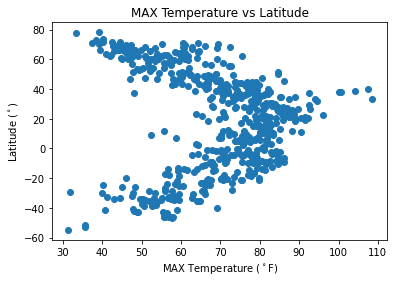

In [509]:
y_values = city_weather2['latitude']
x_values = city_weather2['Max Temp']
plt.scatter(x_values,y_values)

# Label plot and annotate the line equation
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('MAX Temperature ($^\circ$F)')

plt.title("MAX Temperature vs Latitude")
plt.savefig("output_data/MAX_Temp_vs_Latitude.pdf")
plt.savefig("output_data/MAX_Temp_vs_Latitude.png")


plt.show()

### The temperature range from colder towards the North and South Poles to hotter near the Equator makes sense in this scatter plot.

## Latitude vs. Humidity Plot

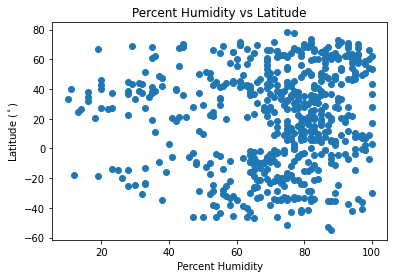

In [510]:
y_values = city_weather2['latitude']
x_values = city_weather2['humidity']
plt.scatter(x_values,y_values)

# Label plot and annotate the line equation
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Percent Humidity')

plt.title("Percent Humidity vs Latitude")
plt.savefig("output_data/Percent_Humidity_vs_Latitude.pdf")
plt.savefig("output_data/Percent_Humidity_vs_Latitude.png")
plt.show()

### This almost reflects population density.  The more extreme dry locations have fewer cities.

## Latitude vs. Cloudiness Plot

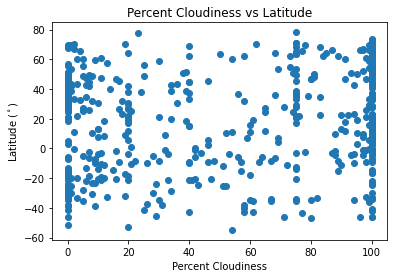

In [511]:
y_values = city_weather2['latitude']
x_values = city_weather2['cloudiness']
plt.scatter(x_values,y_values)

# Label plot and annotate the line equation
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Percent Cloudiness')

plt.title("Percent Cloudiness vs Latitude")
plt.savefig("output_data/Percent_Cloudiness_vs_Latitude.pdf")
plt.savefig("output_data/Percent_Cloudiness_vs_Latitude.png")
plt.show()

### The density of 0% cloudy and 100% cloudy is really surprising in this plot.  Other than that, there appears to be no correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

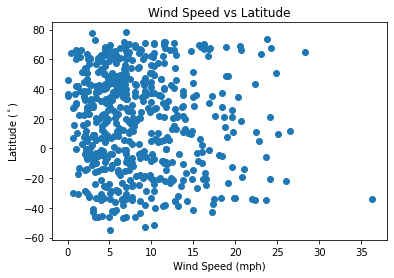

In [512]:
y_values = city_weather2['latitude']
x_values = city_weather2['wind speed']
plt.scatter(x_values,y_values)

# Label plot and annotate the line equation
plt.ylabel('Latitude ($^\circ$)')
plt.xlabel('Wind Speed (mph)')

plt.title("Wind Speed vs Latitude")
plt.savefig("output_data/Wind_Speed_vs_Latitude.pdf")
plt.savefig("output_data/Wind_Speed_vs_Latitude.png")
plt.show()

### This shows wind speeds between 0 and 15 mph are pretty normal throughout the planet.

## Linear Regression

In [513]:
# USED SOLVED FROM 07-Stu_Weather_Stats for these scatter plots with linear regression.

##  Northern Hemisphere - Linear Regressions and Correlations

In [514]:
northern_lat = city_weather2.loc[city_weather2["latitude"] > 0, :]
northern_lat.head()

,city,latitude,longitude,Max Temp,humidity,Feels Like,cloudiness,wind speed,country name,date
1,Meulaboh,4.1363,96.1285,77.40,89,79.02,69,4.41,Indonesia,2022-08-20 01:05:29-07:00
2,Hilo,19.7297,-155.0900,89.28,83,78.21,100,6.91,United States,2022-08-20 01:05:24-07:00
3,Laas,46.6166,10.7002,59.36,95,59.47,100,6.31,Italy,2022-08-20 01:05:29-07:00
9,Lavrentiya,65.5833,-171.0000,45.59,83,42.62,77,5.66,Russia,2022-08-20 01:05:31-07:00
10,Taoudenni,22.6783,-3.9836,96.08,28,95.20,83,4.43,Mali,2022-08-20 01:05:32-07:00


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

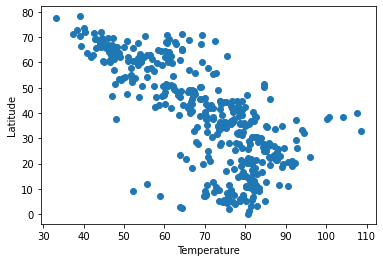

In [515]:
y_values = northern_lat['latitude']
x_values = northern_lat['Max Temp']
plt.scatter(x_values,y_values)
plt.ylabel('Latitude')
plt.xlabel('Temperature')
plt.show()

In [516]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      30.620976
2      18.611456
3      48.857655
9      62.777781
10     11.737320
         ...    
565    40.780545
571    18.287967
572    49.383324
573    43.621181
575    19.652686
Name: Max Temp, Length: 388, dtype: float64


In [519]:
max_temp_correlation = str(round(rvalue**2, 6))
max_temp_correlation

'0.50606'

In [520]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.01x +108.86


The r-value is: 0.5060600207058125


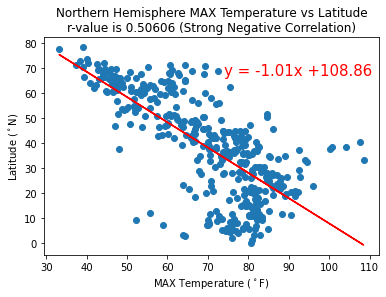

In [522]:
# Create Plot
y_values = northern_lat['latitude']
x_values = northern_lat['Max Temp']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.ylabel('Latitude ($^\circ$N)')
plt.xlabel('MAX Temperature ($^\circ$F)')
plt.annotate(line_eq,xy=(180,180), xycoords='axes pixels',fontsize=15,color="red")

plt.title("Northern Hemisphere MAX Temperature vs Latitude\nr-value is " +max_temp_correlation+ " (Strong Negative Correlation)")
plt.savefig("output_data/Northern_Hemisphere_MAX_Temp_vs_Latitude.pdf")
plt.savefig("output_data/Northern_Hemisphere_MAX_Temp_vs_Latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### This shows a strong negative correlation between temperature and latitude.  As the Northern latitude numbers gets lower (towards the Equator), the temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [523]:
northern_lat = city_weather2.loc[city_weather2["latitude"] > 0, :]
northern_lat.head()

,city,latitude,longitude,Max Temp,humidity,Feels Like,cloudiness,wind speed,country name,date
1,Meulaboh,4.1363,96.1285,77.40,89,79.02,69,4.41,Indonesia,2022-08-20 01:05:29-07:00
2,Hilo,19.7297,-155.0900,89.28,83,78.21,100,6.91,United States,2022-08-20 01:05:24-07:00
3,Laas,46.6166,10.7002,59.36,95,59.47,100,6.31,Italy,2022-08-20 01:05:29-07:00
9,Lavrentiya,65.5833,-171.0000,45.59,83,42.62,77,5.66,Russia,2022-08-20 01:05:31-07:00
10,Taoudenni,22.6783,-3.9836,96.08,28,95.20,83,4.43,Mali,2022-08-20 01:05:32-07:00


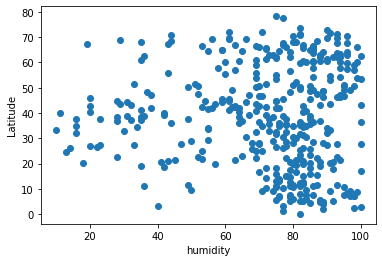

In [524]:
# Create Plot
y_values = northern_lat['latitude']
x_values = northern_lat['humidity']
plt.scatter(x_values,y_values)

# Label plot and annotate the line equation
plt.ylabel('Latitude')
plt.xlabel('humidity')

# Show plot
plt.show()


In [525]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      37.771875
2      37.969647
3      37.574104
9      37.969647
10     39.782553
         ...    
565    37.903723
571    38.167419
572    37.475218
573    37.804837
575    39.090353
Name: humidity, Length: 388, dtype: float64


In [526]:
humidity_correlation = str(round(rvalue**2, 6))
humidity_correlation

'0.001135'

In [527]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.03x +40.71


The r-value is: 0.001134715375021215


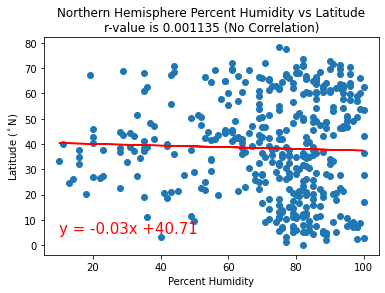

In [531]:
# Create Plot
y_values = northern_lat['latitude']
x_values = northern_lat['humidity']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.ylabel('Latitude ($^\circ$N)')
plt.xlabel('Percent Humidity')
plt.annotate(line_eq, xy=(15,22), xycoords='axes pixels',fontsize=15,color="red")

plt.title("Northern Hemisphere Percent Humidity vs Latitude\nr-value is " +humidity_correlation+ " (No Correlation)")
plt.savefig("output_data/Northern_Hemisphere_Percent_Humidity_vs_Latitude.pdf")
plt.savefig("output_data/Northern_Hemisphere_Percent_Humidity_vs_Latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### The linear regression shows no correlation between percent humidity amd latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

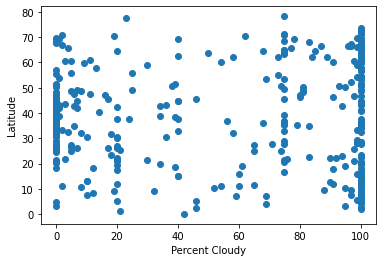

In [532]:
# Create Plot
y_values = northern_lat['latitude']
x_values = northern_lat['cloudiness']
plt.scatter(x_values,y_values)

# Label plot and annotate the line equation
plt.ylabel('Latitude')
plt.xlabel('Percent Cloudy')

# Show plot
plt.show()

In [533]:
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      38.414990
2      38.671723
3      38.671723
9      38.481244
10     38.530934
         ...    
565    38.671723
571    38.009187
572    38.414990
573    38.671723
575    38.381864
Name: cloudiness, Length: 388, dtype: float64


In [534]:
cloudiness_correlation = str(round(rvalue**2, 6))
cloudiness_correlation

'0.000298'

In [535]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.01x +37.84


The r-value is: 0.00029831041565435944


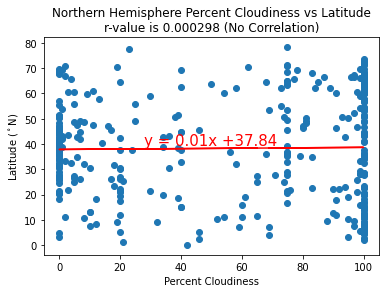

In [537]:
# Create Plot
y_values = northern_lat['latitude']
x_values = northern_lat['cloudiness']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.ylabel('Latitude ($^\circ$N)')
plt.xlabel('Percent Cloudiness')
plt.annotate(line_eq,xy=(100,110), xycoords='axes pixels',fontsize=15,color="red")

plt.title("Northern Hemisphere Percent Cloudiness vs Latitude\nr-value is " +cloudiness_correlation+ " (No Correlation)")
plt.savefig("output_data/Northern_Hemisphere_Percent_Cloudiness_vs_Latitude.pdf")
plt.savefig("output_data/Northern_Hemisphere_Percent_Cloudiness_vs_Latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### There shows no correlation between percent cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

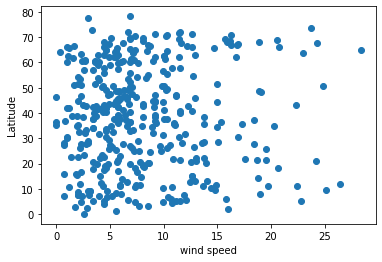

In [538]:
# Create Plot                                         
y_values = northern_lat['latitude']
x_values = northern_lat['wind speed']              # variable is wind speed
plt.scatter(x_values,y_values)

# Label plot and annotate the line equation
plt.ylabel('Latitude')
plt.xlabel('wind speed')                          # variable is wind speed

# Show plot
plt.show()

In [539]:
# Perform a linear regression on wind speed vs. latitude                          # variable is wind speed
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

1      38.080701
2      38.250852
3      38.210015
9      38.165776
10     38.082062
         ...    
565    38.158290
571    38.485659
572    37.827517
573    38.084785
575    38.185514
Name: wind speed, Length: 388, dtype: float64


In [540]:
wind_correlation = str(round(rvalue**2, 6))
wind_correlation

'0.000327'

In [541]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.07x +37.78


The r-value is: 0.00032718942684895264


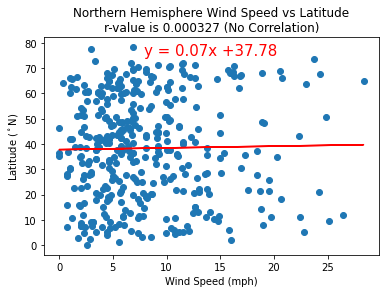

In [543]:
# Create Plot
y_values = northern_lat['latitude']
x_values = northern_lat['wind speed']               # variable is wind speed
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.ylabel('Latitude ($^\circ$N)')
plt.xlabel('Wind Speed (mph)')                            # variable is wind speed
plt.annotate(line_eq,xy=(100,200), xycoords='axes pixels',fontsize=15,color="red")

plt.title("Northern Hemisphere Wind Speed vs Latitude\nr-value is " +wind_correlation+ " (No Correlation)")
plt.savefig("output_data/Northern_Hemisphere_Wind-Speed_vs_Latitude.pdf")
plt.savefig("output_data/Northern_Hemisphere_Wind-Speed_vs_Latitude.png")



# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

### Linear regression shows no correlation between wind speed and latitude.

##  Southern Hemisphere - Linear Regressions and Correlations

In [544]:
southern_lat = city_weather2.loc[city_weather2["latitude"] < 0, :]
southern_lat.head()

,city,latitude,longitude,Max Temp,humidity,Feels Like,cloudiness,wind speed,country name,date
0,Rikitea,-23.1203,-134.9692,72.84,73,73.26,9,6.44,French Polynesia,2022-08-20 01:05:28-07:00
4,Souillac,-20.5167,57.5167,70.30,74,70.52,42,14.79,Mauritius,2022-08-20 01:01:46-07:00
5,Necochea,-38.5473,-58.7368,50.54,62,48.20,0,13.22,Argentina,2022-08-20 01:05:30-07:00
6,Mar del Plata,-38.0023,-57.5575,53.10,70,50.90,0,9.22,Argentina,2022-08-20 01:05:30-07:00
7,Vaini,-21.2000,-175.2000,75.36,83,76.50,20,13.80,Tonga,2022-08-20 01:05:30-07:00


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

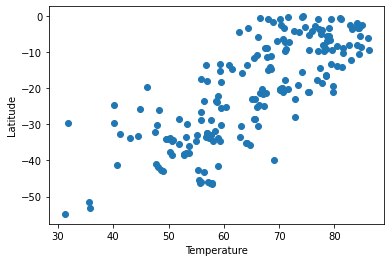

In [545]:
y_values = southern_lat['latitude']
x_values = southern_lat['Max Temp']
plt.scatter(x_values,y_values)
plt.ylabel('Latitude')
plt.xlabel('Temperature')
plt.show()

In [546]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     -14.185884
4     -16.384411
5     -33.487909
6     -31.272071
7     -12.004669
         ...    
567   -15.510194
568   -49.656600
569   -26.182569
570   -32.284778
574   -13.095277
Name: Max Temp, Length: 188, dtype: float64


In [547]:
max_temp_correlation = str(round(rvalue**2, 6))
max_temp_correlation

'0.599192'

In [548]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.87x +-77.23


The r-value is: 0.59919244877756


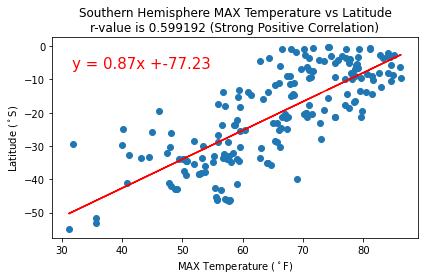

In [550]:
# Create Plot
y_values = southern_lat['latitude']
x_values = southern_lat['Max Temp']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Label plot and annotate the line equation
plt.ylabel('Latitude ($^\circ$S)')
plt.xlabel('MAX Temperature ($^\circ$F)')
plt.annotate(line_eq,xy=(20,170), xycoords='axes pixels',fontsize=15,color="red")

plt.title("Southern Hemisphere MAX Temperature vs Latitude\nr-value is " +max_temp_correlation+ " (Strong Positive Correlation)")
plt.savefig("output_data/Southern_Hemisphere_MAX_Temp_vs_Latitude.pdf")
plt.savefig("output_data/Southern_Hemisphere_MAX_Temp_vs_Latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
#plt.show()
plt.tight_layout()

### This shows a strong positive correlation between temperature and latitude.  As the Southern latitude numbers get greater (towards the Equator), the temperature increases.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

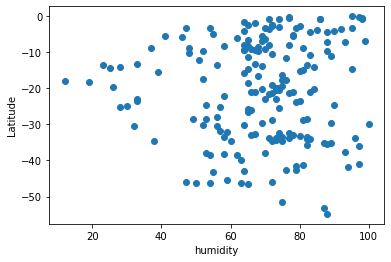

In [551]:
y_values = southern_lat['latitude']
x_values = southern_lat['humidity']
plt.scatter(x_values,y_values)
plt.ylabel('Latitude')
plt.xlabel('humidity')
plt.show()

In [552]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     -20.450174
4     -20.423103
5     -20.747957
6     -20.531387
7     -20.179462
         ...    
567   -20.639672
568   -20.558459
569   -20.341889
570   -20.044107
574   -21.370593
Name: humidity, Length: 188, dtype: float64


In [553]:
humidity_correlation = str(round(rvalue**2, 6))
humidity_correlation

'0.00112'

In [554]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.03x +-22.43


The r-value is: 0.0011202014484467373


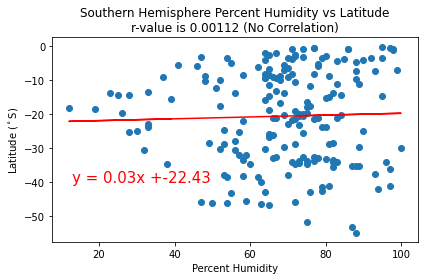

In [556]:
# Create Plot
y_values = southern_lat['latitude']
x_values = southern_lat['humidity']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Label plot and annotate the line equation
plt.ylabel('Latitude ($^\circ$S)')
plt.xlabel('Percent Humidity')
plt.annotate(line_eq,xy=(20,60), xycoords='axes pixels',fontsize=15,color="red")

plt.title("Southern Hemisphere Percent Humidity vs Latitude\nr-value is " +humidity_correlation+ " (No Correlation)")
plt.savefig("output_data/Southern_Hemisphere_Percent_Humidity_vs_Latitude.pdf")
plt.savefig("output_data/Southern_Hemisphere_Percent_Humidity_vs_Latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
#plt.show()
plt.tight_layout()

### There is no correlation shown between percent humidity and latitude for the Southern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

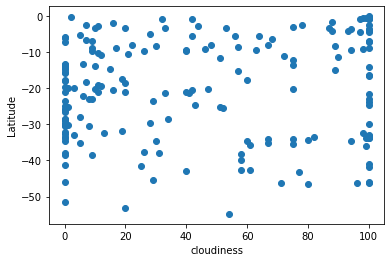

In [557]:
y_values = southern_lat['latitude']
x_values = southern_lat['cloudiness']
plt.scatter(x_values,y_values)
plt.ylabel('Latitude')
plt.xlabel('cloudiness')
plt.show()

In [558]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     -21.598097
4     -20.616691
5     -21.865753
6     -21.865753
7     -21.270961
         ...    
567   -20.497732
568   -21.865753
569   -18.891794
570   -19.635284
574   -21.865753
Name: cloudiness, Length: 188, dtype: float64


In [559]:
cloudiness_correlation = str(round(rvalue**2, 6))
cloudiness_correlation

'0.006852'

In [560]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.03x +-21.87


The r-value is: 0.006851769954673039


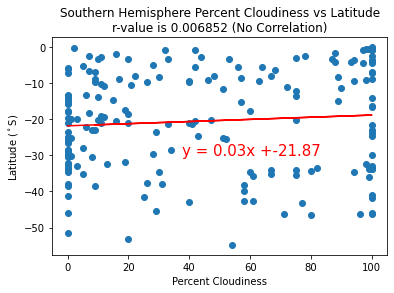

In [563]:
# Create Plot
y_values = southern_lat['latitude']
x_values = southern_lat['cloudiness']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Label plot and annotate the line equation
plt.ylabel('Latitude ($^\circ$S)')
plt.xlabel('Percent Cloudiness')
plt.annotate(line_eq,xy=(130,100), xycoords='axes pixels', fontsize=15,color="red")

plt.title("Southern Hemisphere Percent Cloudiness vs Latitude\nr-value is " +cloudiness_correlation+ " (No Correlation)")
plt.savefig("output_data/Southern_Hemisphere_Percent_Cloudiness_vs_Latitude.pdf")
plt.savefig("output_data/Southern_Hemisphere_Percent_Cloudiness_vs_Latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()
#plt.tight_layout()

### There is no correlation between percent cloudiness and latitude for the Southern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

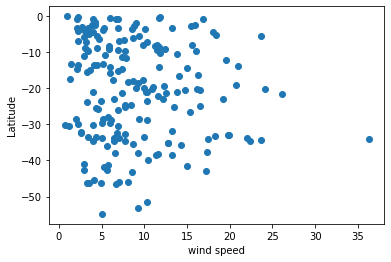

In [564]:
y_values = southern_lat['latitude']
x_values = southern_lat['wind speed']
plt.scatter(x_values,y_values)
plt.ylabel('Latitude')
plt.xlabel('wind speed')
plt.show()

In [565]:
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0     -20.034029
4     -21.775018
5     -21.447670
6     -20.613663
7     -21.568601
         ...    
567   -19.923523
568   -19.946458
569   -20.150789
570   -20.490647
574   -19.366823
Name: wind speed, Length: 188, dtype: float64


In [566]:
wind_correlation = str(round(rvalue**2, 6))
wind_correlation

'0.007717'

In [567]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.21x +-18.69


The r-value is: 0.00771720386807741


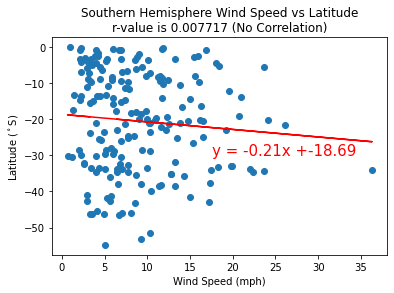

In [569]:
# Create Plot
y_values = southern_lat['latitude']
x_values = southern_lat['wind speed']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Label plot and annotate the line equation
plt.ylabel('Latitude ($^\circ$S)')
plt.xlabel('Wind Speed (mph)')
plt.annotate(line_eq,xy=(160,100), xycoords='axes pixels',fontsize=15,color="red")#,
#            arrowprops=dict(facecolor='red', shrink=0.05))

# plt.title("Southern Hemisphere Wind Speed vs Latitude\nr-value is " + str(round(rvalue**2, 6)) + " (Weak Correlation)")
plt.title("Southern Hemisphere Wind Speed vs Latitude\nr-value is " +wind_correlation+ " (No Correlation)")
plt.savefig("output_data/Southern_Hemisphere_Wind-Speed_vs_Latitude.pdf")
plt.savefig("output_data/Southern_Hemisphere_Wind-Speed_vs_Latitude.png")

# Print r value
print(f"The r-value is: {rvalue**2}")



# Show plot
plt.show()
#plt.tight_layout()

### The linear regression shows no correlation between wind speed and latitude.